The main purpose of this document is to introduce how to apply the clustering, **$k$-means**, implemented by [scikit-learn](https://scikit-learn.org/stable/). This document encompasses three scenarios. In the first case, we will generate a mock dataset forming spherical clusters. Then in the second case, we will employ the normalized iris dataset. And the third scenario involves a dataset lacking spherical clusters.

# 1.  Simulated data for clustering

## 1.1 Data generation

We first import the packages that will be used in this case.

1. [Numpy](https://numpy.org/): Numpy is a powerful Python library for numerical and array-based computing. It provides support for large, multi-dimensional arrays and matrices, along with a wide range of mathematical functions to operate on these arrays efficiently. 

2. [sklearn.datasets.make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html): Make_blobs  is a function provided by scikit-learn, used to generate isotropic Gaussian blobs for clustering.

3. [sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html): KMeans is a class provided by scikit-learn, used to create a $k$-means clustering.

4. [matplotlib.pyplot](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html): matplotlib.pyplot is a state-based interface to matplotlib. It provides an implicit, MATLAB-like, way of plotting. It also opens figures on your screen, and acts as the figure GUI manager.

5. [seaborn](https://seaborn.pydata.org/): Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

These packages will be utilized in following tasks for data generation, clustering, hyperparameter tuning and evaluation.

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

First, we generate the data by `make_blobs`.

The parameter `n_samples` indicates the number of data points; `n_features` represents the number of features for each sample; `centers`(int) specifies the number of centers to generate; `cluster_std` controls the standard deviation of the clusters; `random_state` determines random number generation for dataset creation, ensuring consistent output when supplied with an integer across multiple function calls.

In this instance, we generate a dataset featuring 2 attributes, allowing for straightforward visualization. The dataset comprises 100 data points and encompasses 3 centers. The standard deviation of these clusters is defined as 1.5, and an integer is employed as the random state to ensure reproducibility.

In [2]:
X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std = 1.5, random_state=42)

Visualize the generated dataset by [sns.scatterplot()](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) to gain a concise overview of its distribution.

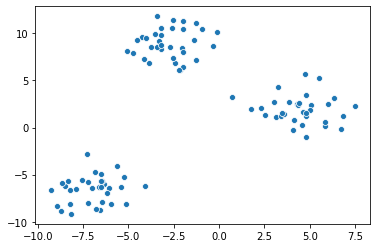

In [3]:
sns.scatterplot(x = X[:,0],y = X[:,1])

## 1.2 Clustering:  $k$-Means

For conducting a $k$-means clustering, we use the [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) provided by scikit-learn.

The parameter `n_clusters` represents the important hyperparameter of $k$-means, the number of clusters $k$. By default, it is set to `8`. Later on, we will delve into optimizing this hyperparameter.

The attribute `labels_` represents the labels of each point.

The attribute `inertia_` indicates the sum of squared distances of samples to their closest cluster centre.

First, let's have a look at how the $k$-means performs on the default `n_clusters`, with `random_state` set to 0.

In [4]:
kmeans_model = KMeans(random_state=0)

The [fit()](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.fit) method is a fundamental function in scikit-learn's machine learning models used for training the model on the provided training data.

The `fit()` here computes $k$-means clustering.

In [5]:
kmeans_model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

We utilize the [predict()](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.predict) function to determine the nearest cluster for each sample in X. 

This function yields the index of the corresponding cluster for each sample.

In [6]:
labels = kmeans_model.predict(X)

Next, we employ [sns.color_palette()](https://seaborn.pydata.org/tutorial/color_palettes.html) to generate a range of colors, allowing us to designate distinct colors for each cluster.

In [7]:
colors = sns.color_palette("bright", 8)

Then we use [sns.scatterplot()](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) to create a scatter plot of the dataset with clustered labels.

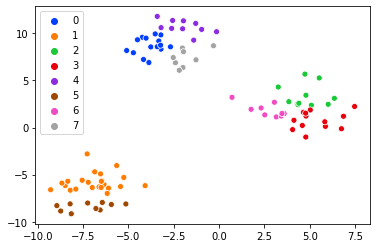

In [8]:
sns.scatterplot(x = X[:,0],y = X[:,1], hue = labels, palette = colors)

When executing $k$-means clustering, the first step is to randomly choose several data points to serve as the initial center points. Varying starting centroids can yield divergent clustering outcomes, converging to local minima instead of the global one. Thus, employing a distinct random seed regulated by the `random_state` parameter can engender disparate results.

We try a different `random_state` value then, while keeping all other parameters unchanged.

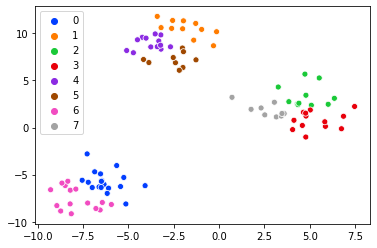

In [9]:
kmeans_model = KMeans(random_state=42)
kmeans_model.fit(X)
labels = kmeans_model.predict(X)
colors = sns.color_palette("bright", 8)
sns.scatterplot(x = X[:,0],y = X[:,1], hue = labels, palette = colors)

Obviously, we have obtained different clustering results.

### 1.2.1 Tuning hyperparameter

First, we calculate SSE for different values of k. 

As introduced in the lecture, k is usually selected from 2 to $\sqrt{n}$ where $n$ is the number of all data points. Thus, for this dataset, we can have a look at the range from 2 to 10.

Then for each k, computes $k$-means clustering and calculate the SSE by the attribute `inertia_`. You could also calculate and plot according the mean SSE as introduced in the lecture, by dividing the SSE by the number of data points. We will include a plot illustrating the average Sum of Squared Errors (SSE) for the purpose of comparison. It's evident that employing the elbow method to determine the optimal value of k using either individual SSE values or the mean SSE will yield the same selected value of k.

In [10]:
sse = []
mean_sse = []
divisor = X.shape[0]
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    mean_sse.append(kmeans.inertia_/divisor)

Then we plot SSE vs. k by [plt](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html).

[plt.figure()](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure) is used to create a new figure and we set the figure size by the parameter `figsize`.

[plt.plot()](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) is used to plot y versus x as lines and markers as we set parameter `marker` to `o`.

The title and the names for x-axis and y-axis are set by [plt.title()](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.title.html#matplotlib.pyplot.title), [plt.xlabel()](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.xlabel.html#matplotlib.pyplot.xlabel), [plt.ylabel()](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.ylabel.html#matplotlib.pyplot.ylabel), respectively.

[plt.xticks()](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.xticks.html#matplotlib.pyplot.xticks) is employed to designate labels for the x-axis.

The layout of grid lines is configured with [plt.grid()](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.grid.html#matplotlib.pyplot.grid).

To render all active figures, [plt.show()](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.show.html#matplotlib.pyplot.show) is called.

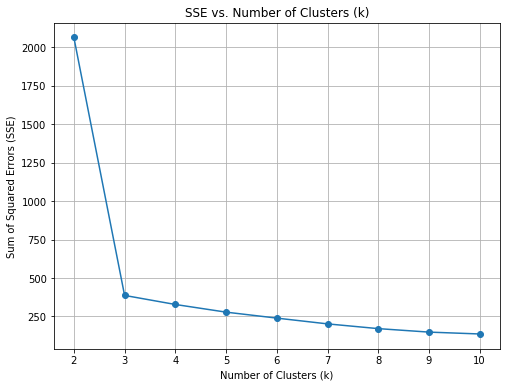

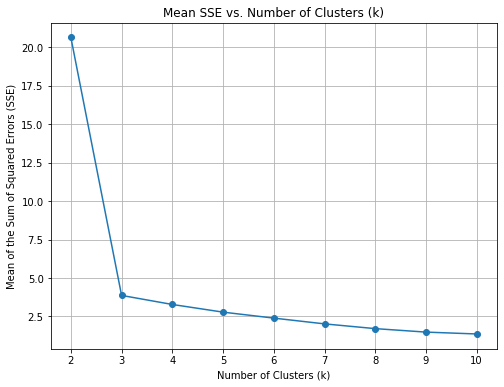

In [11]:
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), sse, marker='o')
plt.title('SSE vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(np.arange(2, 11))
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), mean_sse, marker='o')
plt.title('Mean SSE vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Mean of the Sum of Squared Errors (SSE)')
plt.xticks(np.arange(2, 11))
plt.grid(True)
plt.show()

Following the `Elbow` method outlined in the lecture, the optimal value appears to be k = 3.

Subsequently, we proceed to execute $k$-means clustering with k = 3 and generate a corresponding plot.

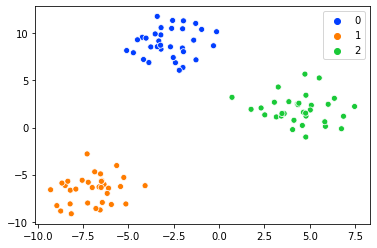

In [12]:
kmeans_model_3 = KMeans(n_clusters = 3)
kmeans_model_3.fit(X)
labels_3 = kmeans_model_3.predict(X)
colors = sns.color_palette("bright", 3)
sns.scatterplot(x = X[:,0],y = X[:,1], hue = labels_3, palette = colors)

Visual inspection reveals that the model exhibits good performance.

# 2. Real dataset

## 2.1 Data Preparation

We import some additional packages for this case.

1. [Pandas](https://pandas.pydata.org/): Pandas is an open-source Python library widely used for data manipulation, analysis, and cleaning tasks. The central data structure in Pandas is the [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) which provides methods to facilitate the preliminary examination of essential properties, statistical summaries, and a select number of rows for a cursory exploration of the data.

2. [sklearn.manifold.TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html): TSNE is a class provided by scikit-learn, which implement T-SNE(T-distributed Stochastic Neighbor Embedding), a tool to visualize high-dimensional data.

These packages and those imported in the first case will be utilized in following tasks for data loading, clustering, hyperparameter tuning and evaluation.

In [13]:
import pandas as pd
from sklearn.manifold import TSNE

First, we load the data for clustering.

In [14]:
df = pd.read_csv('iris_normalized.csv')

## 2.2 Clustering: $k$-Means

Apply $k$-means clustering to the dataset using the same method as described earlier.

In [15]:
kmeans_8 = KMeans()
kmeans_8.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Calculate the SSE by the attribute `inertia_`.

In [16]:
SSE_8 = kmeans_8.inertia_
print('The SSE is:', SSE_8)

The SSE is: 63.30135927478237


Save the predicted labels by the attribute `labels_` for evaluation.

In [17]:
labels_8 = kmeans_8.labels_

Plotting the data and clusters can give us a qualitative sense of how well the algorithm has separated the data. 

However, this dataset has 4 features so we cannot plot directly. We use the tool [TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) from scikit-learn here. T-SNE converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data.

**Note: T-SNE falls outside the scope of this course, rendering this section supplementary.**

First, we initialize T-SNE and transform the dataset to 2D. We set the parameter `random_state` to `0` for reproducibility.

In [18]:
tsne = TSNE(random_state=0)
tsne_results = tsne.fit_transform(df)

Then we use [sns.color_palette()](https://seaborn.pydata.org/tutorial/color_palettes.html) to generate colors for specifying the colors for different clusters. 

In [19]:
colors = sns.color_palette("bright", 8)

After that, we use [sns.scatterplot()](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) to plot the transformed dataset in the scatter plot with clustered labels.

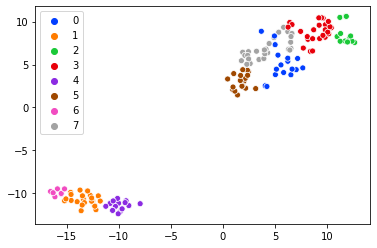

In [20]:
sns.scatterplot(x = tsne_results[:,0],y = tsne_results[:,1], hue = labels_8, palette = colors)

### 2.2.1 Tuning hyperparameter

We tune the hyperparameter using the same method as described earlier.

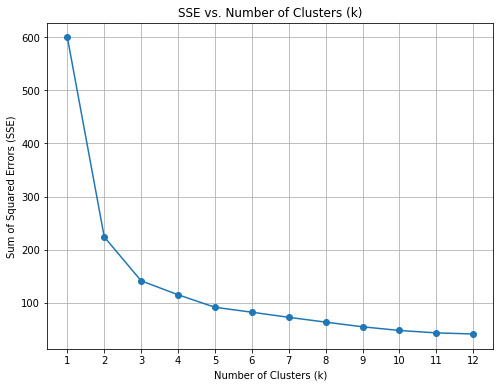

In [21]:
# Calculate SSE for different values of k
sse = []
for k in range(1, 13):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

# Plot SSE vs. k
plt.figure(figsize=(8, 6))
plt.plot(range(1, 13), sse, marker='o')
plt.title('SSE vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(np.arange(1, 13))
plt.grid(True)
plt.show()

According to the `Elbow` method introduced in the lecture, k = 3 can be considered as the best value.

Then we implement a $k$-means clustering with k = 3.

In [22]:
kmeans_3 = KMeans(n_clusters = 3)
kmeans_3.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Calculate the SSE by the attribute `inertia_`.

In [23]:
SSE_3 = kmeans_3.inertia_
print('The SSE is:', SSE_3)

The SSE is: 140.965816630747


Save the predicted labels by the attribute `labels_` for evaluation.

In [24]:
labels_3 = kmeans_3.labels_

Plot it for visual evaluation as introduced above.

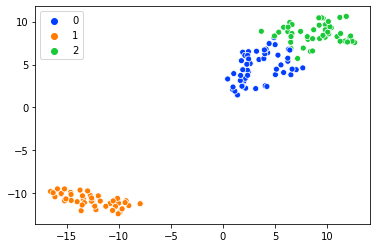

In [25]:
# Initialize TSNE and transform the dataset to 2D
tsne = TSNE(random_state=0)
tsne_results = tsne.fit_transform(df)

# Specify the colors for different clusters
colors = sns.color_palette("bright", 3)

# Plot the transformed dataset in the scatter plot with clustered labels
sns.scatterplot(x = tsne_results[:,0],y = tsne_results[:,1], hue = labels_3, palette = colors)

While the performance of the upper left section remains suboptimal, the visualization for k = 3 significantly outperforms that of k = 8.

# 3. Data not forming spherical clusters

## 3.1 Data preparation

First, we load the data for clustering.

In [26]:
df_spiral = pd.read_csv('spiral.csv')
X_spiral = df_spiral.iloc[:,:-1].values
labels_spiral = df_spiral.iloc[:,-1].values

Then we plot the data for visual inspection.

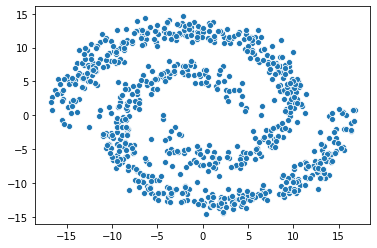

In [27]:
sns.scatterplot(x = X_spiral[:,0],y = X_spiral[:,1])

We can observe that the data do not coalesce into spherical clusters, contrasting with the patterns observed in the previous two cases.

Try to apply $k$-means to it and assess its performance.

By visual inspection, the best k should be 2, so set the `n_clusters` to 2 for [KMeans()](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

In [28]:
kmeans_spiral = KMeans(n_clusters = 2)
kmeans_spiral.fit(X_spiral)
labels_spiral = kmeans_spiral.labels_

In [29]:
colors = sns.color_palette("bright", 2)

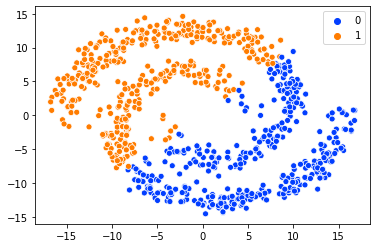

In [30]:
sns.scatterplot(x = X_spiral[:,0],y = X_spiral[:,1], hue = labels_spiral, palette = colors)

The dataset indicates the limitation $k$-means. In the upcoming week, we will introduce alternative clustering models that exhibit improved results on this data.

Author: *Kaki Zhou* 18/8/2023 